In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Ladda in data
dataInvånvare = pd.read_csv('Sammanställning.csv')

nyData = dataInvånvare.dropna() # Tar bort rader med missing values

# Visa de första raderna
print(nyData.head())

                Region      År  Folkmängd  AntalPersonPerHushåll   Döda  \
1  0114 Upplands Väsby  2019.0    46786.0                    2.4  296.0   
2      0115 Vallentuna  2019.0    34090.0                    2.6  191.0   
3       0117 Österåker  2019.0    45574.0                    2.5  284.0   
4          0120 Värmdö  2019.0    45000.0                    2.5  239.0   
5        0123 Järfälla  2019.0    79990.0                    2.4  564.0   

   Flyttningsöverskott   Födda  Invandringsöverskott  Invånare60plus  \
1               1004.0   514.0                 376.0          9881.0   
2                531.0   314.0                 160.0          6972.0   
3                602.0   413.0                 217.0         10619.0   
4                420.0   404.0                 196.0         10001.0   
5               1017.0  1018.0                 559.0         16998.0   

   InvånarePerKvKilometer  Medelålder  Folkmängd_3ÅrTidigare  \
1                   623.8        39.3               

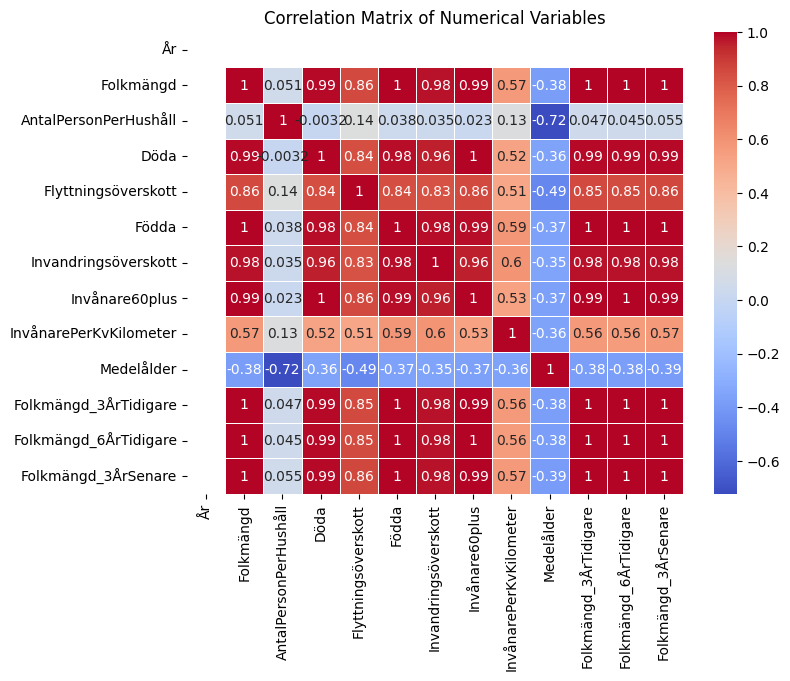

In [25]:
# Heatmap of correlation matrix
plt.figure(figsize=(8, 6))
correlation_matrix = nyData.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

In [26]:
# Välj features och target
X = nyData[[ 'Folkmängd',  'AntalPersonPerHushåll','Medelålder','Folkmängd_3ÅrTidigare', 'Folkmängd_6ÅrTidigare']]
y = nyData['Folkmängd_3ÅrSenare']

# Dela upp data i tränings- och testset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Skapa en linjär regressionsmodell
model = LinearRegression()

# Träna modellen
model.fit(X_train, y_train)

LinearRegression()

In [27]:
# Gör prediktioner på testdata
y_pred = model.predict(X_test)

# Beräkna mean squared error och R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse}")
print(f"R2 score: {r2}")

Mean squared error: 246536.58013089723
R2 score: 0.9997989479134742


In [28]:
# Exempel: Förutsäg antal medborgae för en kommun
#[ 'Folkmängd',  'AntalPersonPerHushåll','Medelålder','Folkmängd_3ÅrTidigare', 'Folkmängd_6ÅrTidigare']

#Vallentuna 34090, 2.6, 39, 32785, 31616  Invånare 2022 34851  (estimerat 35035.48)
nyaVärdenRegion = [[34090, 2.6, 39, 32785, 31616]]   
beräknadFolkmängd = model.predict(nyaVärdenRegion)
print(f"Förväntat antalet medborgare 2022 för Vallentuna:: {beräknadFolkmängd[0]:.2f} ")

#Sollentuna 73857, 2.5, 39.1, 71023, 68145  Invånare 2022 76237  (estimerat 75508)
nyaVärdenRegion = [[73857, 2.5, 39.1, 71023, 68145]]   
beräknadFolkmängd = model.predict(nyaVärdenRegion)
print(f"Förväntat antalet medborgare 2022 för Sollentuna:: {beräknadFolkmängd[0]:.2f} ")

Förväntat antalet medborgare 2022 för Vallentuna:: 35035.48 
Förväntat antalet medborgare 2022 för Sollentuna:: 75508.34 


c:\Users\clajn\Documents\Python_Kurs\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\clajn\Documents\Python_Kurs\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
